### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [4]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [4]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [5]:
data = apl.arrayPlateMeasurement()

In [ ]:
data.connect()

### Run the following cell just to get a quick reading

In [14]:
currents = data.readCurrents()
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

In [23]:
currents = data.readCurrents()
# apl.plotI(currents)
data.append(
    pressure = 1.4e-4,
    Vbias = 162,
    Ibias = -.08,
    Varc = 77.7,
    Iarc = 4.38,
    Vext = 120,
    Iext = 200.0,
    Ibase = 9.58,
    currents = currents,
    note = 'Increasing Vext only.'
)
data.plotI()

Number of entries: 11


In [24]:
data.save('data')

In [25]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [6]:
data = apl.arrayPlateMeasurement()
data.load("data_201117_112624.json")

11 entries loaded.


,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
0,201117_110439,194,148.0,120,10.0,77.0,4.25,6.06,0.00008,Electron current going out and pulling Vext up...


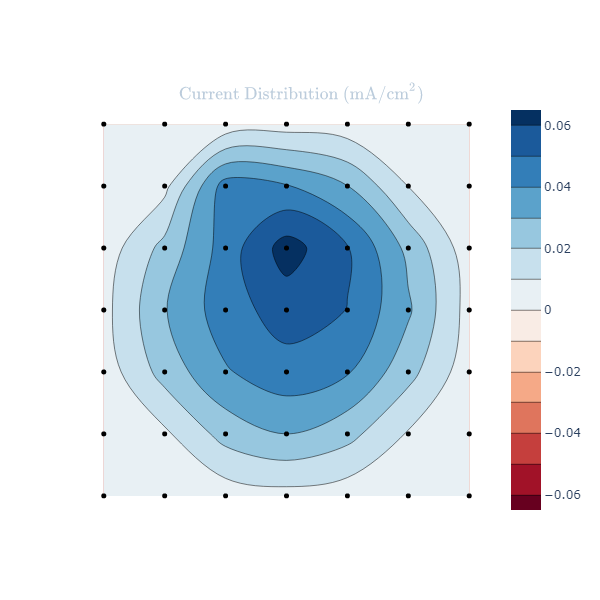

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
1,201117_110639,100,139.0,21,-10.0,77.0,4.25,-3.9,0.000085,Electrons now on plate.


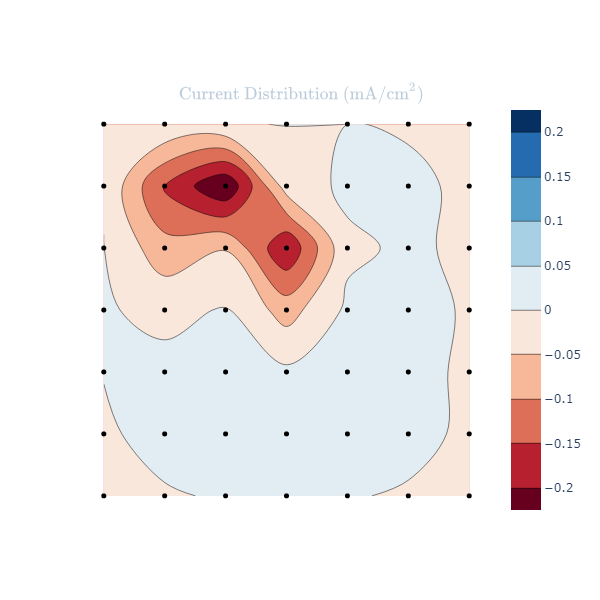

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
2,201117_111448,120,365.0,33,-30.0,77.7,4.35,10.57,0.00014,DC fail on Vext. Vext is being pulled up to 33...


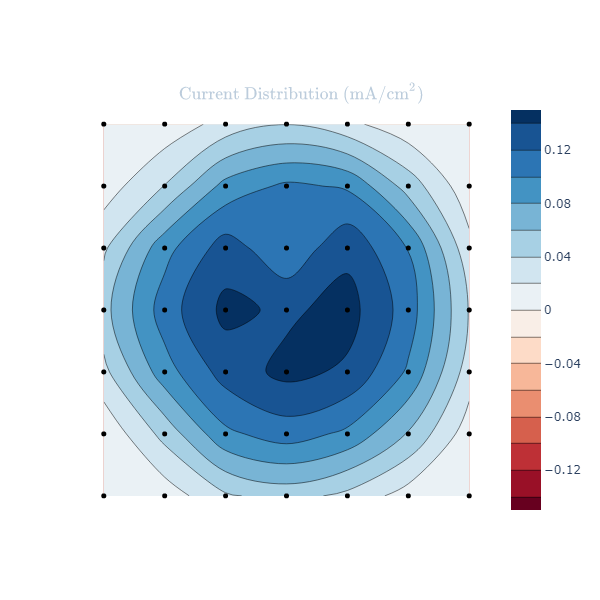

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
3,201117_111638,120,330.0,50,0.0,77.7,4.35,10.57,0.00014,Increasing Vext only


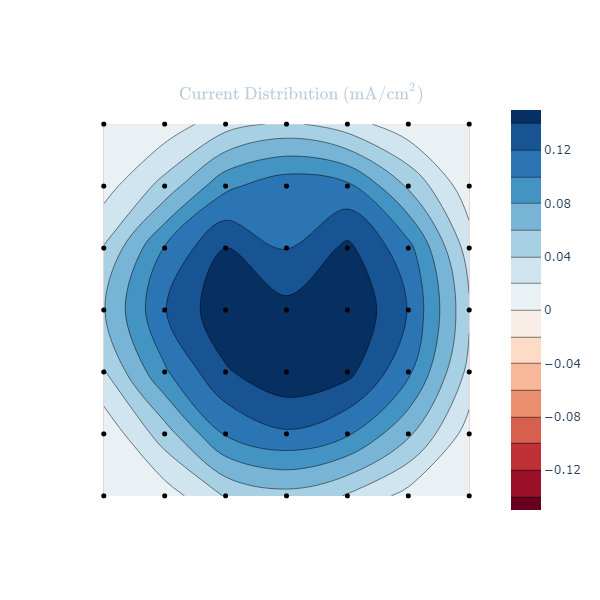

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
4,201117_111717,120,288.0,60,20.0,77.7,4.35,10.14,0.00014,Increasing Vext only


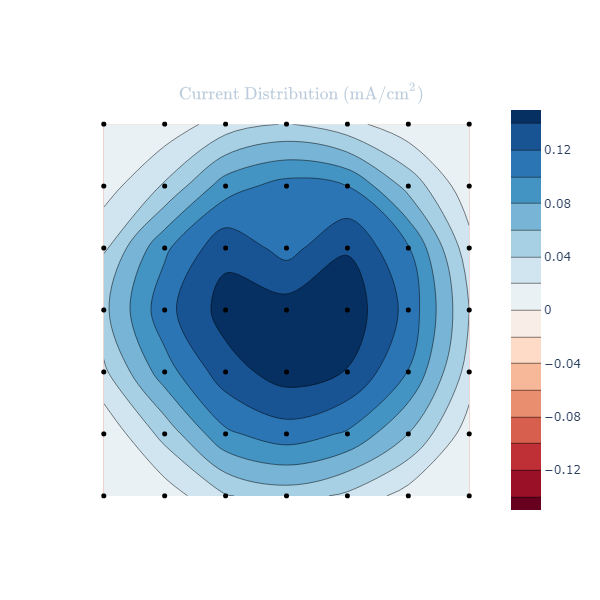

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
5,201117_111757,120,193.0,70,80.0,77.7,4.35,8.28,0.00014,Increasing Vext only


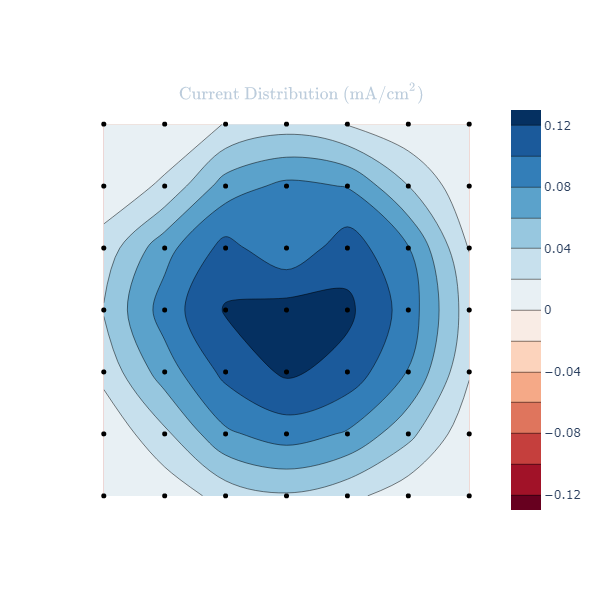

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
6,201117_111918,120,-0.01,80,20.0,77.7,4.32,4.99,0.00014,Increasing Vext only


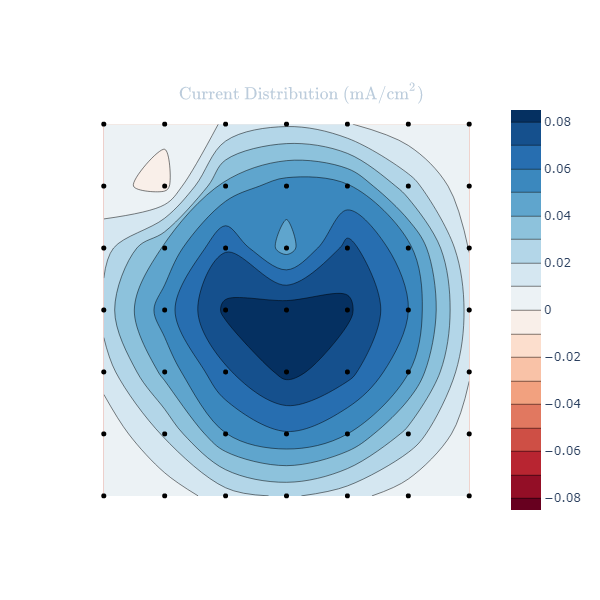

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
7,201117_112006,131,-0.01,90,20.0,77.7,4.32,6.85,0.00014,DC Fail on Vbias


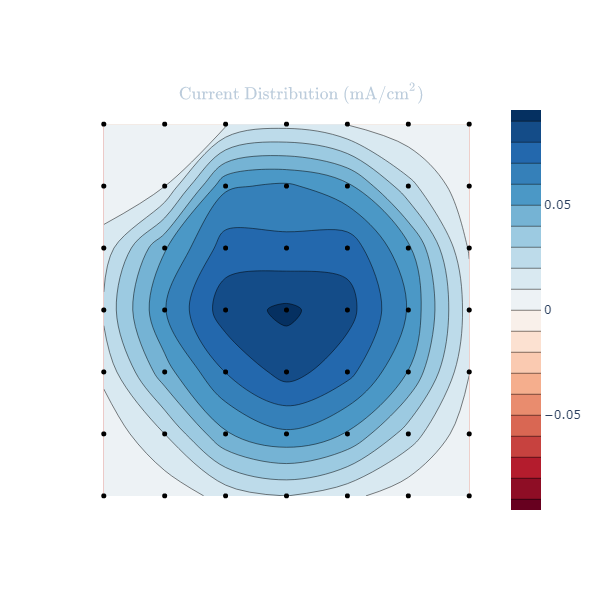

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
8,201117_112118,143,-0.09,100,180.0,77.7,4.32,7.8,0.00014,Increasing Vext only. DC Fail on Vbias


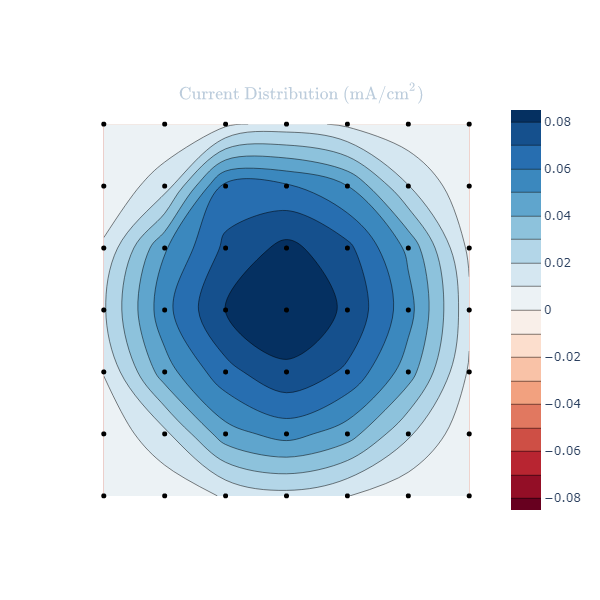

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
9,201117_112319,152,-0.09,110,200.0,77.7,4.38,9.2,0.00014,Increasing Vext only.


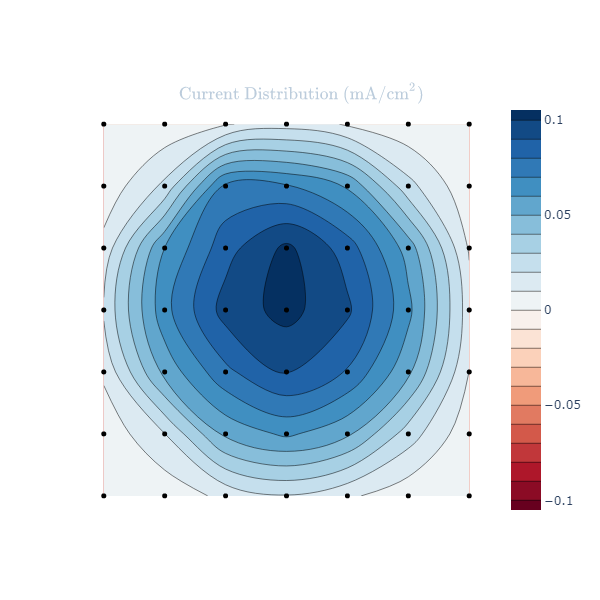

,time,Vbias,Ibias,Vext,Iext,Varc,Iarc,Ibase,pressure,note
10,201117_112405,162,-0.08,120,200.0,77.7,4.38,9.58,0.00014,Increasing Vext only.


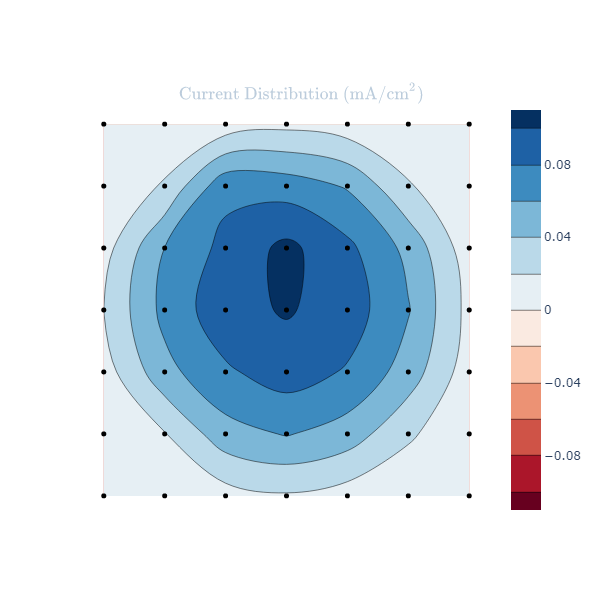

In [8]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(data.data)
df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]

for i in range(data.len()):
    display(df[i:i+1])
    fig = data.plotI(i)
    display(Image(pio.to_image(fig, format='png'))) # use this to have static graphs render on github.
#     fig.show()